# Boat Sales: Exploring Relationship

## Table of Contents
### 1. Importing Data
### 2. Subsetting Data
### 3. Exploring Relationships
### 4. Exporting Data


### 01. Importing Data

In [11]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [12]:
# define path 

path = r''

In [13]:
# importing dataframe

df = pd.read_pickle(os.path.join(path, 'Prepared_Data', 'Filtered_Boat_Sales.pkl'))

In [14]:
df_original = pd.read_csv(os.path.join(path, 'Raw_Data', 'Boat Sales', 'boat_data.csv'))

In [15]:
# check matplotlib version

matplotlib.__version__

'3.8.4'

In [16]:
# ensure the charts created will be displayed

%matplotlib inline

### 02. Subsetting Data

#### Questions

###### 1. Temporal Trend Analysis
###### • Can be noticed any increase or decrease in the number of visit depending on the country or year of the boat?
###### • Are there any clear trend? 
###### • Are there any pattern between any variable and the boat price or number of visits?
###### 2. Spatial Analysis
###### • What are the most common Location(country) of a boat by number of visits?
###### • Is there any difference by Location? 
###### 3. Cause and Origin Analysis
###### • What are the most common price of boats?
###### • Is it possible to notice any pattern the price during the years? Older boats tend to be less expensive than new ones?
###### • Is it possible to observe a correlation between any variable and the number of visits or price of the boat? 
###### 4. Impact Analysis
###### • How much impact the Year_Built cause in the number of visits?
###### • How much impact the Price cause in the number of visits?

##### Columns 

In [17]:
# shape

df.shape

(6607, 10)

In [18]:
# check all columns name in the dataframe

df.columns

Index(['Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length', 'Width',
       'Material', 'Views_7_days', 'Country', 'Amount_US'],
      dtype='object')

##### Subset 

In [19]:
df.describe()

,Year_Built,Length,Width,Views_7_days,Amount_US
count,6607.000000,6607.000000,6607.000000,6607.000000,6.607000e+03
mean,2006.764038,11.224324,3.469700,162.011200,3.164292e+05
std,12.658449,5.181720,1.128329,170.771177,8.994402e+05
min,1901.000000,0.999090,0.860000,13.000000,5.250000e+02
25%,2000.000000,7.470000,2.540000,73.000000,3.850000e+04
50%,2008.000000,10.000000,3.300000,113.000000,9.350000e+04
75%,2018.000000,13.720000,4.200000,187.000000,2.695000e+05
max,2021.000000,56.000000,16.000000,3263.000000,2.585000e+07


In [20]:
# create a subset of quantitative variables 

sub = df[['Year_Built', 'Length','Width','Views_7_days','Amount_US']]

In [21]:
# check subset

sub

,Year_Built,Length,Width,Views_7_days,Amount_US
0,2020,4.00,1.50,75,3839.00
1,2019,3.55,1.46,58,3738.90
2,1987,4.35,1.75,239,525.00
3,2004,4.70,2.00,69,3850.00
4,2020,4.40,1.65,113,690.00
...,...,...,...,...,...
6602,1974,7.20,2.70,1299,750.00
6603,1980,6.00,2.10,1917,749.85
6604,1984,6.00,1.62,288,742.50
6605,2020,4.40,1.80,354,4948.90


In [22]:
# check subset shape

sub.shape

(6607, 5)

### 3. Exploring Relationships

### Correlations:

In [23]:
# check the correlation between the variables

sub.corr()

,Year_Built,Length,Width,Views_7_days,Amount_US
Year_Built,1.000000,-0.091224,-0.077697,-0.194199,0.120260
Length,-0.091224,1.000000,0.917885,-0.168280,0.609389
Width,-0.077697,0.917885,1.000000,-0.185154,0.533574
Views_7_days,-0.194199,-0.168280,-0.185154,1.000000,-0.060170
Amount_US,0.120260,0.609389,0.533574,-0.060170,1.000000


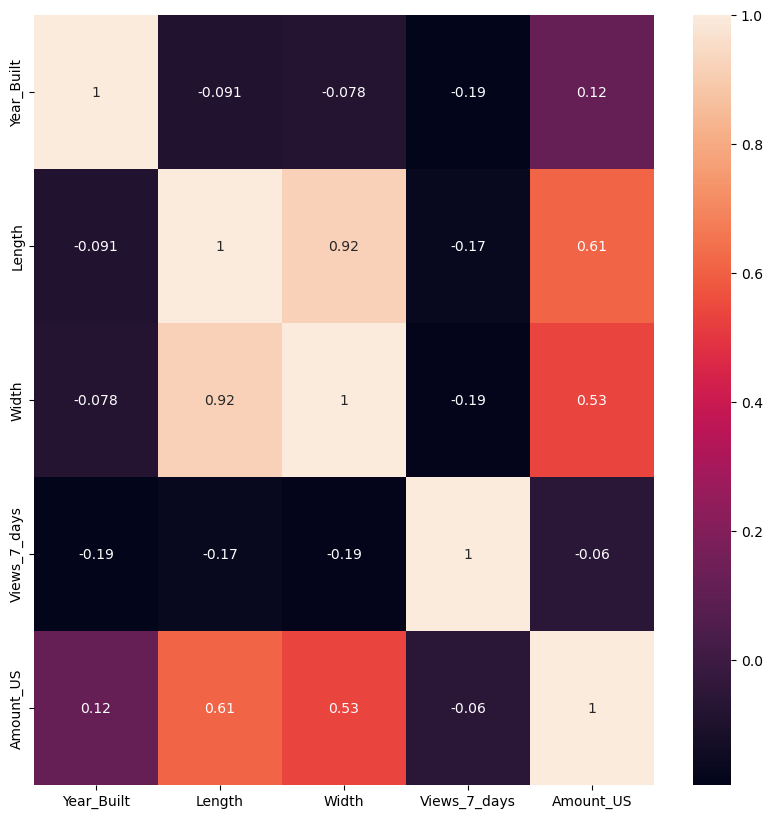

In [24]:
# Create a correlation matrix heatmap in seaborn

# First, define a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create a Heatmap 
corr = sns.heatmap(sub.corr(),annot=True,ax = ax)


###### According to the visualization above, it is possible to notice that most of the variables have no correlation between each other. except for the following one:

###### Lenght and Width - 0.92 (strong relationship)

###### Considering that there are not so many considerable relationships between variables, I will also investigate if there is any relationship between the Price and Length or Width


### Scatterplots:

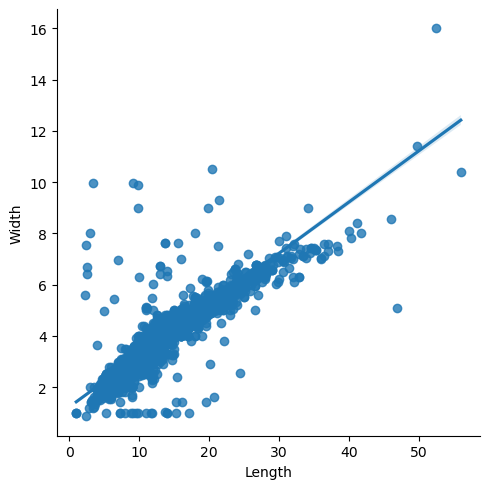

In [25]:
# scatterplot 'Number_of_Responding_Personnel' and 'Exposures'

sns.lmplot(x = 'Length', y = 'Width', data = sub)

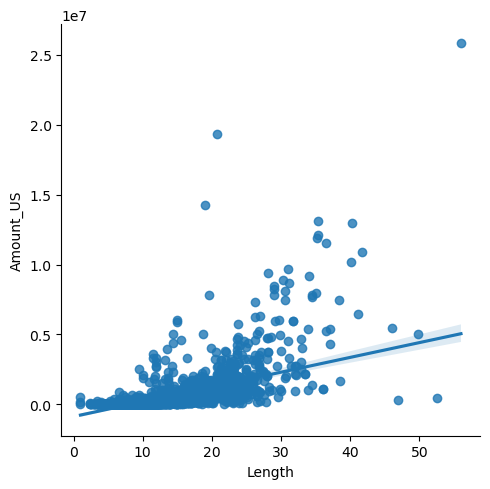

In [26]:
# scatterplot 'Number_of_Responding_Personnel' and 'Exposures'

sns.lmplot(x = 'Length', y = 'Amount_US', data = sub)

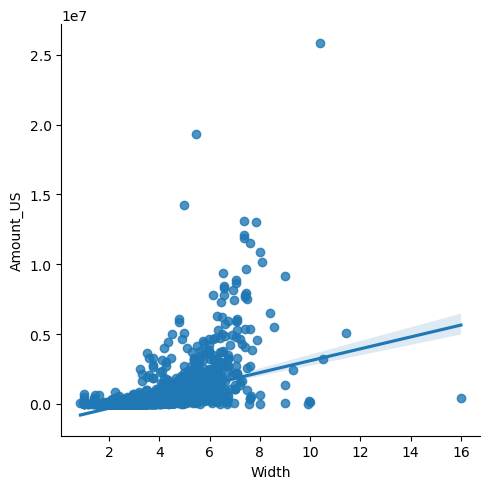

In [27]:
# scatterplot 'Number_of_Responding_Personnel' and 'Exposures'

sns.lmplot(x = 'Width', y = 'Amount_US', data = sub)

###### According to the visualization above, it is possible to notice that there is a strong, positive correlation between lenght and width. As width increase, the length also increases. 

###### As for the relationship between Width & Amount_Us, as well as Length & Amount_US, even though there is a positive trend line with some data points near this line, this would be considered more or less horizontal, which implies in no correlation between the variables. Also, since the relationship between these variable is weak, the Width (or length) does not affect directly the increase of the price. 

### Pair Plots:

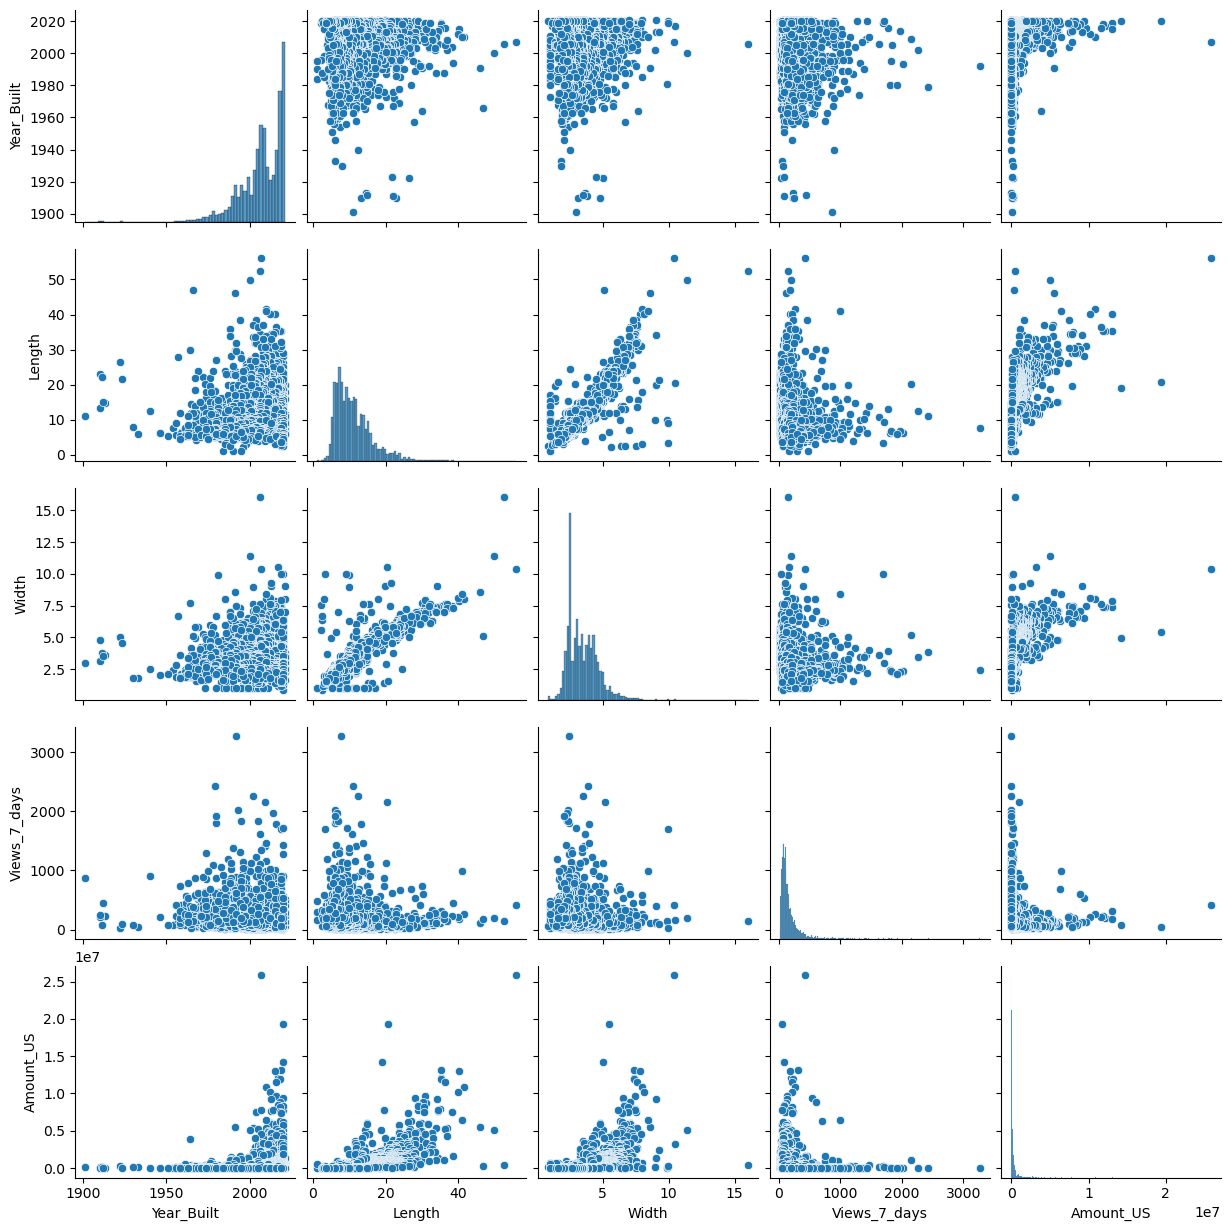

In [28]:
# Create a pair plot 

sns.pairplot(sub)

###### Considering that this data revolves around the number of visits in the last 7 days, I would like to dive deeper into all the information regarding this variable, especially the year built and Amount_US variavels. 


### Categorical Plots:

##### Creating a categorical variable that splits the "Price per Unit" column into categories

<Axes: xlabel='Views_7_days', ylabel='Count'>

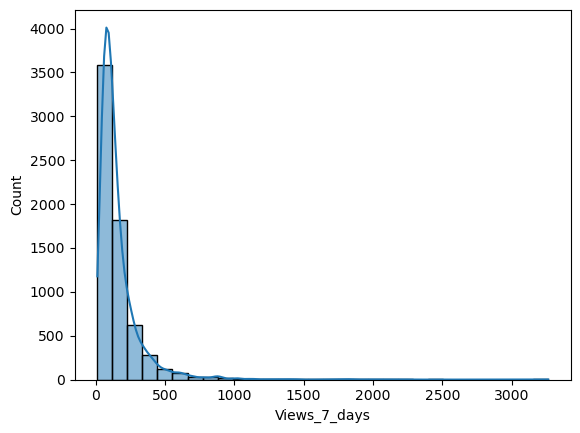

In [29]:
# Create a Categorical Plot 

sns.histplot(df['Views_7_days'], bins = 30, kde = True)

In [30]:
# describe the column to them create categories 

df['Views_7_days'].describe()

count    6607.000000
mean      162.011200
std       170.771177
min        13.000000
25%        73.000000
50%       113.000000
75%       187.000000
max      3263.000000
Name: Views_7_days, dtype: float64

In [31]:
# Views category - Low rate

df.loc[df['Views_7_days'] < 113, 'Visit_Rate'] = 'Low visit rate'

In [32]:
# Views category - Mid rate

df.loc[(df['Views_7_days'] >= 113) & (df['Views_7_days'] < 187), 'Visit_Rate'] = 'Mid visit rate'

In [33]:
# Views category - High rate

df.loc[df['Views_7_days'] >= 187, 'Visit_Rate'] = 'High visit rate'

In [34]:
# check

df['Visit_Rate'].value_counts(dropna = False)

Visit_Rate
Low visit rate     3293
High visit rate    1667
Mid visit rate     1647
Name: count, dtype: int64

In [35]:
df['Year_Built'].describe()

count    6607.000000
mean     2006.764038
std        12.658449
min      1901.000000
25%      2000.000000
50%      2008.000000
75%      2018.000000
max      2021.000000
Name: Year_Built, dtype: float64

In [36]:
# Year Built category - 1901-1921

df.loc[(df['Year_Built'] >= 1901) & (df['Year_Built'] <= 1921), 'Year_Built_Group'] = '1901-1921'

In [37]:
# Year Built category - 1922-1941

df.loc[(df['Year_Built'] >= 1922) & (df['Year_Built'] <= 1941), 'Year_Built_Group'] = '1922-1941'

In [38]:
# Year Built category - 1942-1961

df.loc[(df['Year_Built'] >= 1942) & (df['Year_Built'] <= 1961), 'Year_Built_Group'] = '1942-1961'

In [39]:
# Year Built category - 1962-1981

df.loc[(df['Year_Built'] >= 1962) & (df['Year_Built'] <= 1981), 'Year_Built_Group'] = '1962-1981'

In [40]:
# Year Built category - 1982-2001

df.loc[(df['Year_Built'] >= 1982) & (df['Year_Built'] <= 2001), 'Year_Built_Group'] = '1982-2001'

In [41]:
# Year Built category - 2002-2021

df.loc[df['Year_Built'] >= 2002, 'Year_Built_Group'] = '2002-2021'

In [42]:
df.columns

Index(['Boat_Type', 'Manufacturer', 'Type', 'Year_Built', 'Length', 'Width',
       'Material', 'Views_7_days', 'Country', 'Amount_US', 'Visit_Rate',
       'Year_Built_Group'],
      dtype='object')

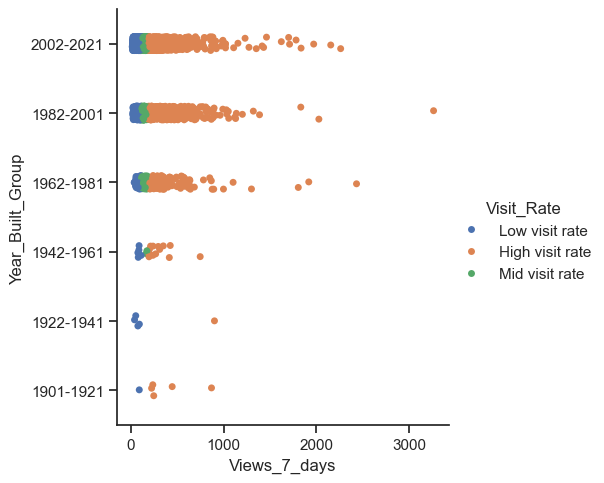

In [43]:
# Create a categorical plot in seaborn

sns.set(style="ticks")
g = sns.catplot(x="Views_7_days", y="Year_Built_Group", hue="Visit_Rate", data=df)

In [44]:
# fig = g.get_figure()
g.savefig("viewXyear.png") 

###### Even though there is no correlation between views and year built, it is possible to notice that there is no presence of Mid visit rate (above 113 and below 187) in boats built before 1942. So, this could lead potencially to a trend between number of views and year built. 



### 04. Exporting Data

In [45]:
df.to_pickle(os.path.join(path, 'Prepared Data','categorical_variables_Boat_Sales.pkl'))

In [46]:
df.to_csv(os.path.join(path, 'Prepared Data','categorical_variables_Boat_Sales.csv'))